<a href="https://colab.research.google.com/github/Neeharika414/AreaCalcli/blob/master/Cyclone_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 65 bytes


In [3]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vivek2841/cropped-cyclone-data

100% 5.17G/5.18G [01:10<00:00, 81.8MB/s]
100% 5.18G/5.18G [01:10<00:00, 78.5MB/s]


In [4]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import keras
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

<ipython-input-4-1ac652c29ad7>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
!unzip /content/cropped-cyclone-data.zip

In [6]:
# prompt:  CSV file it contains filename and Category , based on that i need to Separate the inages into categories floders

import pandas as pd
import shutil

# Read the CSV file
df = pd.read_csv('/content/Cropped_cyclone_data/Cropped_cyclone_labels.csv')

# Create the categories folders if they don't exist
for category in df['Category'].unique():
    os.makedirs(os.path.join('categories', category), exist_ok=True)

# Iterate over the CSV file and move the images to the corresponding categories folders
for _, row in df.iterrows():
    filename = row['filename']
    category = row['Category']
    src_path = os.path.join('/content/Cropped_cyclone_data/Cropped_cyclone_images', filename)
    dst_path = os.path.join('categories', category, filename)
    shutil.move(src_path, dst_path)


In [7]:
import pandas as pd
df = pd.read_csv('/content/Cropped_cyclone_data/Cropped_cyclone_labels.csv')
df


,Unnamed: 0,Sequence,Name,MSWS kts,Category,filename,Set
0,0,1,PHAILIN,25,D,08OCT2013_0830_1.jpg,Train
1,1,1,PHAILIN,25,D,08OCT2013_0830_1_flip_h.jpg,Train
2,2,1,PHAILIN,25,D,08OCT2013_0830_1_flip_v.jpg,Train
3,3,1,PHAILIN,25,D,08OCT2013_0830_1_rot_90.jpg,Train
4,4,1,PHAILIN,25,D,08OCT2013_0830_1_rot_180.jpg,Train
...,...,...,...,...,...,...,...
103363,127873,91,JAWAD,25,D,05DEC2021_2330_1_flip_h.jpg,Train
103364,127874,91,JAWAD,25,D,05DEC2021_2330_1_flip_v.jpg,Train
103365,127875,91,JAWAD,25,D,05DEC2021_2330_1_rot_90.jpg,Train
103366,127876,91,JAWAD,25,D,05DEC2021_2330_1_rot_180.jpg,Train


In [48]:
# prompt: Show the count number of images in a directory

import os
def count_images(directory):
  return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

print(count_images('/content/categories/CS'))
print(count_images('/content/categories/D'))
print(count_images('/content/categories/DD'))
print(count_images('/content/categories/SCS'))
print(count_images('/content/categories/SuCS'))
print(count_images('/content/categories/VSCS'))


20677
37890
21051
9207
729
13814


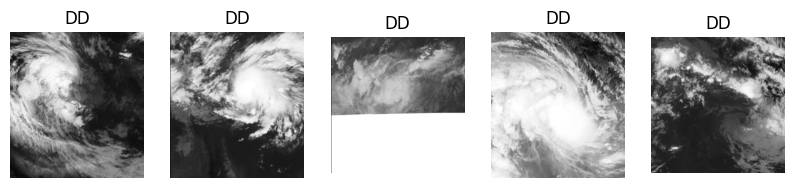

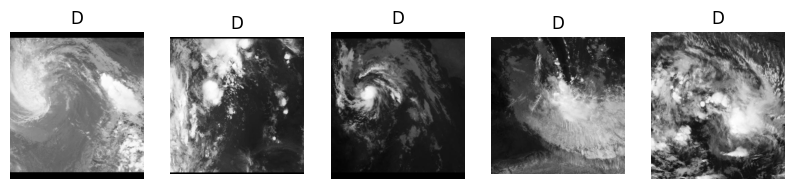

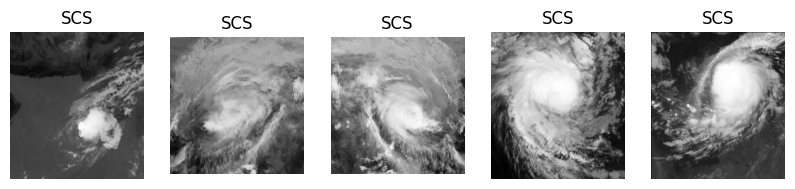

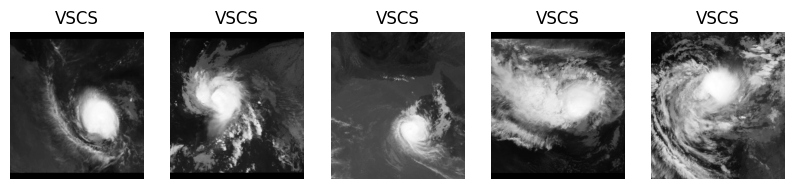

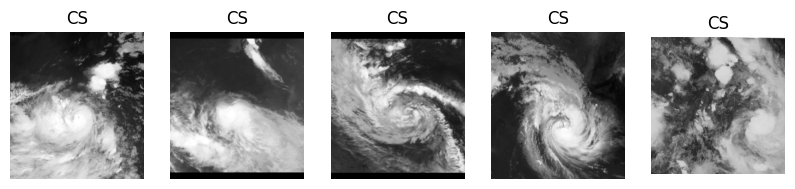

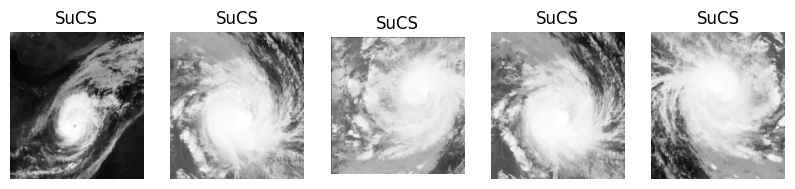

In [9]:
# prompt: show 5 pictures of each sub folder with its name

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get the list of subfolders
subfolders = os.listdir('/content/categories')

# Iterate over the subfolders
for subfolder in subfolders:
  # Get the list of images in the subfolder
  images = os.listdir(os.path.join('/content/categories', subfolder))

  # Show the first 5 images
  plt.figure(figsize=(10, 10))
  for i in range(5):
    image_path = os.path.join('/content/categories', subfolder, images[i])
    img = mpimg.imread(image_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img,cmap="gray")
    plt.title(subfolder)
    plt.axis('off')
  plt.show()


In [10]:
# prompt: resize all images to 224 , 224 , and cmap = "gray"

# Get the list of subfolders
subfolders = os.listdir('/content/categories')

# Iterate over the subfolders
for subfolder in subfolders:
  # Get the list of images in the subfolder
  images = os.listdir(os.path.join('/content/categories', subfolder))

  # Resize and save the images
  for image in images:
    image_path = os.path.join('/content/categories', subfolder, image)
    img = mpimg.imread(image_path)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    cv2.imwrite(image_path, img, [cv2.IMWRITE_JPEG_QUALITY, 100])


In [11]:
# prompt: Divide categories Directory into two ,for training 80% ,for testing 20% data

import os
import shutil

# Get the list of subfolders
subfolders = os.listdir('/content/categories')

# Iterate over the subfolders
for subfolder in subfolders:
  # Get the list of images in the subfolder
  images = os.listdir(os.path.join('/content/categories', subfolder))

  # Split the images into training and testing sets
  train_images, test_images = train_test_split(images, test_size=0.2)

  # Create the training and testing directories for the subfolder
  train_dir = os.path.join('/content/train', subfolder)
  test_dir = os.path.join('/content/test', subfolder)
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)

  # Move the images to the training and testing directories
  for image in train_images:
    image_path = os.path.join('/content/categories', subfolder, image)
    shutil.copy(image_path, os.path.join(train_dir, image))
  for image in test_images:
    image_path = os.path.join('/content/categories', subfolder, image)
    shutil.copy(image_path, os.path.join(test_dir, image))


In [12]:

# Define paths for training and validation data (assuming separate folders)
train_data_dir = '/content/train'
validation_data_dir = '/content/test'

# Load training data with standardization
train_generator = keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    labels='inferred'
)

# Load validation data (same settings as training for consistency)
validation_generator = keras.utils.image_dataset_from_directory(
    directory=validation_data_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    labels='inferred'
)

Found 82692 files belonging to 6 classes.
Found 20676 files belonging to 6 classes.


In [13]:
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_generator=train_generator.map(process)
validation_generator =validation_generator.map(process)

In [14]:
# prompt: Now get Pre Define model like DenseNet121 for faster training

model = tf.keras.applications.DenseNet121(include_top=False,
                                          weights='imagenet',
                                          input_shape=(256, 256, 3),
                                          pooling=None)
model.trainable = False


29084464/29084464 [==============================] - 0s 0us/step


In [15]:
# prompt: Define Your Classifier Head: Add a new classifier head to the pre-trained model. This typically consists of a few convolutional layers, followed by global pooling (e.g., average pooling) and a final dense layer with the number of output neurons equal to the number of intensity categories (6 in your case).

# Add a new classifier head
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(6, activation='softmax')(x)

# Create the new model
model = tf.keras.Model(inputs=model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=8, validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)




Epoch 1/8
2585/2585 [==============================] - 400s 149ms/step - loss: 1.0634 - accuracy: 0.5522 - val_loss: 0.9527 - val_accuracy: 0.6003
Epoch 2/8
2585/2585 [==============================] - 391s 151ms/step - loss: 0.8535 - accuracy: 0.6470 - val_loss: 0.7878 - val_accuracy: 0.6804
Epoch 3/8
2585/2585 [==============================] - 384s 149ms/step - loss: 0.7102 - accuracy: 0.7128 - val_loss: 0.7690 - val_accuracy: 0.6923
Epoch 4/8
2585/2585 [==============================] - 392s 151ms/step - loss: 0.6165 - accuracy: 0.7537 - val_loss: 0.6716 - val_accuracy: 0.7337
Epoch 5/8
2585/2585 [==============================] - 394s 152ms/step - loss: 0.5400 - accuracy: 0.7857 - val_loss: 0.6247 - val_accuracy: 0.7574
Epoch 6/8
2585/2585 [==============================] - 385s 149ms/step - loss: 0.4820 - accuracy: 0.8116 - val_loss: 0.5883 - val_accuracy: 0.7689
Epoch 7/8
2585/2585 [==============================] - 383s 148ms/step - loss: 0.4392 - accuracy: 0.8282 - val_loss: 0

In [16]:
# Save the model1
model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# prompt: Load the model and send image from the Test  and show the prediction value and actual value for that show prediction value in categories

# Load the model
model = keras.models.load_model('/content/model1.h5')

# Get the list of subfolders in the test directory
subfolders = os.listdir('/content/test')

# Iterate over the subfolders
for subfolder in subfolders:
  # Get the list of images in the subfolder
  images = os.listdir(os.path.join('/content/test', subfolder))

  # Choose a random image from the subfolder
  image_path = os.path.join('/content/test', subfolder, images[0])

  # Load the image
  img = keras.preprocessing.image.load_img(image_path, target_size=(256, 256))

  # Preprocess the image
  x = keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0

  # Make a prediction
  prediction = model.predict(x)

  # Get the predicted category
  predicted_category = np.argmax(prediction)

  # Get the actual category
  actual_category = subfolder

  # Print the prediction and actual category
  print("Prediction:", predicted_category)
  print("Actual:", actual_category)


1/1 [==============================] - 2s 2s/step
Prediction: 0
Actual: DD
1/1 [==============================] - 0s 29ms/step
Prediction: 1
Actual: D
1/1 [==============================] - 0s 27ms/step
Prediction: 3
Actual: SCS
1/1 [==============================] - 0s 26ms/step
Prediction: 5
Actual: VSCS
1/1 [==============================] - 0s 29ms/step
Prediction: 1
Actual: CS
1/1 [==============================] - 0s 27ms/step
Prediction: 4
Actual: SuCS


1/1 [==============================] - 0s 31ms/step


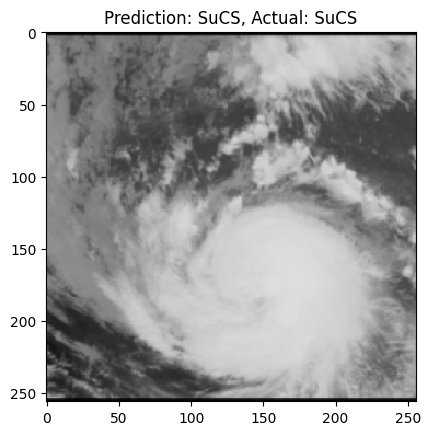

1/1 [==============================] - 0s 29ms/step


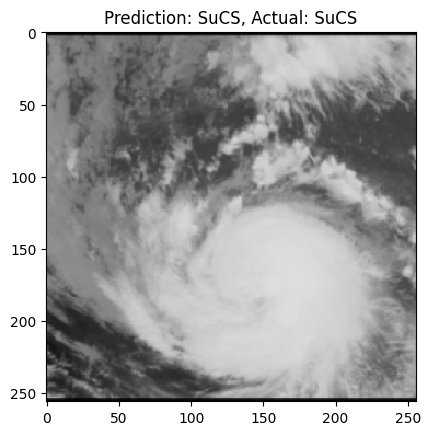

1/1 [==============================] - 0s 30ms/step


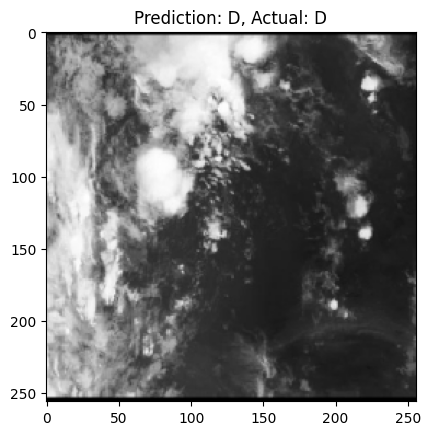

1/1 [==============================] - 0s 30ms/step


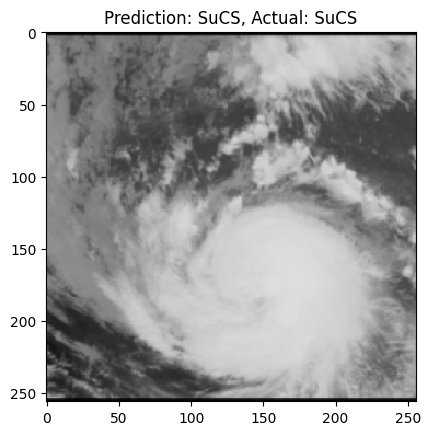

1/1 [==============================] - 0s 29ms/step


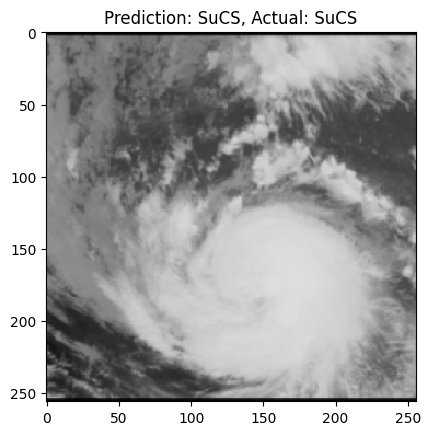

In [47]:
# prompt: Show 5 random images , prediction values ,actual values in a Box  side by side

import numpy as np
import matplotlib.pyplot as plt

# Get the list of subfolders in the test directory
subfolders = os.listdir('/content/test')

# Choose 5 random subfolders
random_subfolders = np.random.choice(subfolders, 5)

# Iterate over the random subfolders
for subfolder in random_subfolders:
  # Get the list of images in the subfolder
  images = os.listdir(os.path.join('/content/test', subfolder))

  # Choose a random image from the subfolder
  image_path = os.path.join('/content/test', subfolder, images[0])

  # Load the image
  img = keras.preprocessing.image.load_img(image_path, target_size=(256, 256))

  # Preprocess the image
  x = keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0

  # Make a prediction
  prediction = model.predict(x)

  # Get the predicted category
  predicted_category = np.argmax(prediction)

  # Get the actual category
  actual_category = subfolder
  p=['CS','D','DD','SCS','SuCS','VSCS']
  # Plot the image and prediction
  plt.imshow(img)
  plt.title(f'Prediction: {p[predicted_category]}, Actual: {actual_category}')
  plt.show()

